In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
def plot_data(data_src, title, max_elapsed_time=None, metric="Eval", window=5):
    data = pd.read_csv(data_src, names=["Steps", "Elapsed Time", "Eval Mean", "Eval Max", "Train Mean", "Train Max"])
    # Convert time to minutes
    data["Elapsed Time"] = data["Elapsed Time"].apply(lambda x: x / 60)
    
    # Remap title
    title_map ={"Eval": "Evaluation",
               "Train": "Training"}
    
    # Moving average
    data["Moving Average Mean"] = data[metric + " Mean"].rolling(window).mean()
    data["Moving Average Max"] = data[metric + " Max"].rolling(window).mean()
    
    # Limit time
    if max_elapsed_time:
        data = data[data["Elapsed Time"] < max_elapsed_time]
    
    # Figure
    fig = plt.figure()
    ax = plt.axes()
    
    ax.fill_between(data["Elapsed Time"], -21, data["Moving Average Mean"], color=np.random.rand(3,), label="Mean")
    ax.fill_between(data["Elapsed Time"], data["Moving Average Mean"], data["Moving Average Max"], color=np.random.rand(3,), label="Max")
    
    ax.set_xlim([0, max(data["Elapsed Time"])])
    ax.set_ylim([-21, 21])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    
    ax.set_title(title_map[metric] + " - " + title)
    ax.set_xlabel('Elapsed Time (m)')
    ax.set_ylabel('Score')
    ax.legend()
    
    return data, fig
    

In [143]:
data_srcs = {"Canonical ES 1h30 6 CPUs": "1h30_canonical_es/stat.txt",
            "Canonical ES without Batch Normalization 1h30 6 CPUs": "1h30_canonical_es_nobn/stat.txt",
             "Canonical ES Modified Network 1h30 6 CPUs": "modified_network/stat.txt",
             "Canonical ES 5h 16 CPUs": "5h_canonical_es/stat.txt"
            }

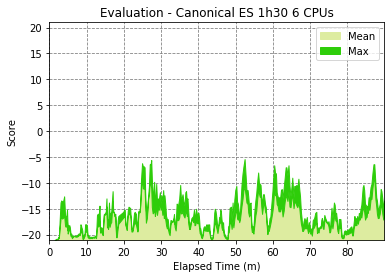

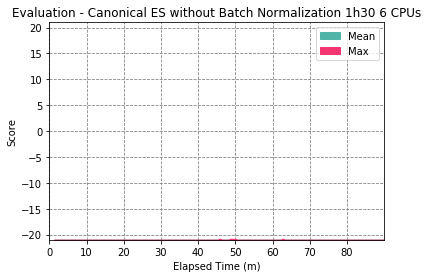

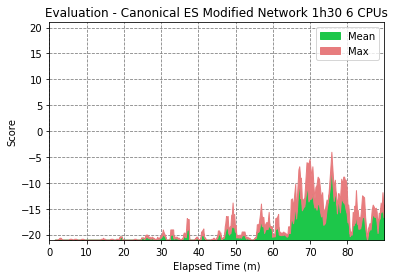

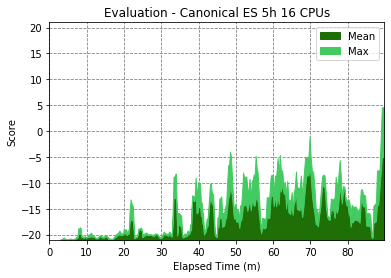

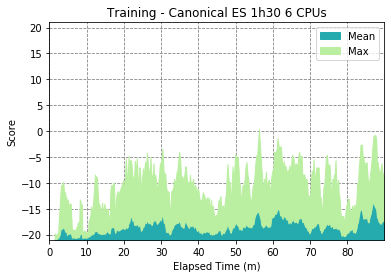

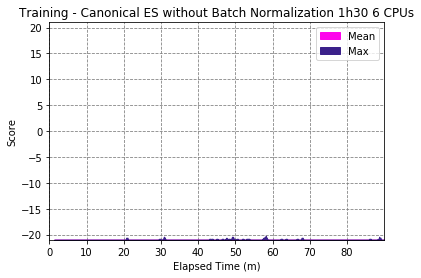

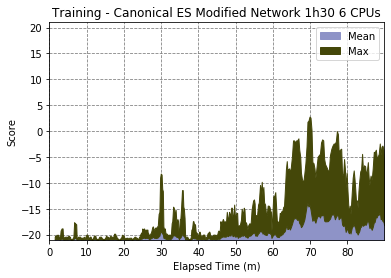

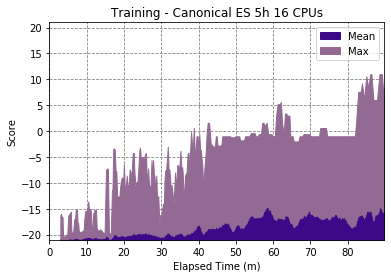

In [151]:
window=5
for metric in ["Eval", "Train"]:
# metric="Train"
    for name, data_src in data_srcs.items():
        data, fig = plot_data(data_src, name,metric=metric, 
                              window=window if name !="Canonical ES 5h 16 cpus" else int(window * 300 / 90),
    #                                 max_elapsed_time=90
                              max_elapsed_time=90 if name !="Canonical ES 5h 16 cpus" else None
                             )
        fig.savefig(metric + name.replace(" ", "_") + ".svg", format="svg")
